# Song Streaming Services Analysis

## Your research question:
[Complete this based on your chosen data set]



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

music_data = pd.read_csv("spotify-2023.csv", encoding="latin1") # Talk with Mr. Moden about how to get access to your data


## Part 1: Get a sense of the data
Before you start doing anything with you data, you need to get a sense of what the data contains. Considering using .info(), .describe(), .columns, or other tools to get a sense of the data. You can reference ChatGPT if you are looking for other options.

In [2]:
music_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
music_data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [4]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
music_data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

## Explanation
In the space below, explain what you found from your code

      - there is data from different music streaming companies 
      - there is danceabiliy and energy, are they similar/correlated? 
      - energy and bpm could also be correlated 

### Write your response in this space.

## Part 2: Data Cleaning
Look for missing data. If you decide to drop rows or columns, explain your choice.

In [6]:
music_data.dropna(subset=['in_shazam_charts'], how = "any", inplace = True)
music_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            903 non-null    object
 1   artist(s)_name        903 non-null    object
 2   artist_count          903 non-null    int64 
 3   released_year         903 non-null    int64 
 4   released_month        903 non-null    int64 
 5   released_day          903 non-null    int64 
 6   in_spotify_playlists  903 non-null    int64 
 7   in_spotify_charts     903 non-null    int64 
 8   streams               903 non-null    object
 9   in_apple_playlists    903 non-null    int64 
 10  in_apple_charts       903 non-null    int64 
 11  in_deezer_playlists   903 non-null    object
 12  in_deezer_charts      903 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   903 non-null    int64 
 15  key                   817 non-null    ob

In [7]:
music_data['streams'] = pd.to_numeric(music_data['streams'], errors='coerce')

music_data = music_data[pd.notna(music_data['streams'])]
music_data = music_data[music_data['streams'].astype(int) == music_data['streams']]
print(music_data["streams"].dtype)

float64


Did you drop columns or rows? If so, explain why. If not, explain why not.



### Write your response in this space.
i dropped all the rows with nan in "in shazam charts" column. Now i have full data for most columns minus "key" which has some missing (i wont be using keys)

i also converted my streams from objects to ints 

## Part 3: Data manipulation
Use groupby to analyze data and get a better understanding of potential trends. For example, if you want to look at scoring likelihood, you might group teams by whether they were home or away or you could group them by team. You should be using groupby on categorical data, not on numerical data (ask me why if you aren't sure).

groupby was unnecessary for my project so i did not use it. 

In [8]:
for value in music_data["in_shazam_charts"]:
    print(value)

826
382
949
548
425
946
418
194
953
339
251
168
1,021
1,281
187
0
1,173
187
29
0
150
73
139
1,093
168
96
211
325
0
294
197
27
310
354
184
212
81
82
100
62
69
727
311
1,133
102
332
259
140
16
110
810
176
0
615
210
216
215
167
37
0
171
16
0
272
529
26
5
169
230
176
0
84
154
194
93
0
115
72
8
0
323
49
1,451
1,170
429
162
82
10
0
478
0
236
200
78
5
266
486
204
34
202
312
32
153
519
458
48
184
0
666
14
925
88
203
44
74
638
64
71
2
3
0
136
88
148
22
368
22
1
189
176
52
0
9
31
66
66
0
208
1
28
558
195
13
93
60
503
72
0
56
34
153
15
454
26
40
200
285
129
162
58
0
0
44
26
13
117
47
20
1
0
0
30
80
263
116
57
39
37
0
0
111
7
166
1
19
167
0
99
51
0
10
0
31
3
31
73
0
26
19
171
109
42
33
69
0
675
348
8
0
36
1
3
14
0
240
56
113
6
1
29
29
23
4
3
44
182
1
1
0
2
49
54
0
438
23
9
11
0
33
17
84
54
31
1
50
49
9
29
0
20
4
6
320
55
0
33
55
4
0
5
20
0
37
4
64
18
55
16
0
38
1
37
30
43
0
9
27
0
2
0
105
5
1
0
51
0
1
24
6
1
33
63
0
78
2
1
58
28
10
117
52
9
0
444
14
85
0
22
16
6
10
13
18
1
0
0
3
9
0
0
9
21
165
0
6

In [9]:
music_data["in_shazam_charts"] = music_data["in_shazam_charts"].astype(str).str.replace(',', '').astype(int)
print(music_data["in_shazam_charts"].dtype)


int64


### Write your response in this space.

# Part 4: Data Visualization

In [23]:
music_data = music_data[music_data["in_spotify_charts"] != 0]
music_data = music_data[music_data["in_apple_charts"] != 0]
music_data = music_data[music_data["in_deezer_charts"] != 0]
music_data = music_data[music_data["in_shazam_charts"] != 0]




In [24]:
top_ten_apple= music_data["in_apple_charts"].nlargest(10)
print(top_ten_apple)

872    275
0      263
17     227
6      222
12     215
5      213
8      210
2      207
3      207
10     205
Name: in_apple_charts, dtype: int64


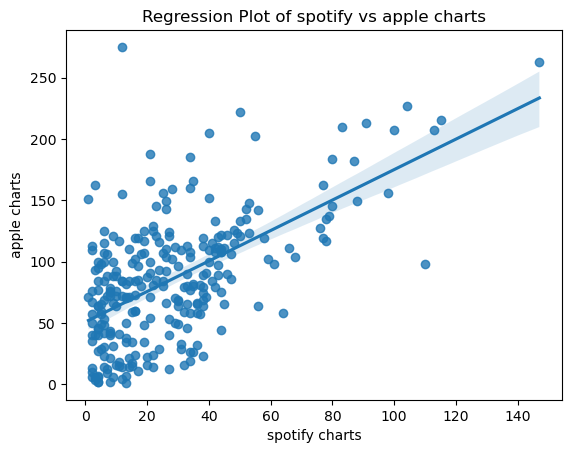

In [25]:
sns.regplot(x=music_data["in_spotify_charts"], y=music_data["in_apple_charts"], data=music_data)
plt.title("Regression Plot of spotify vs apple charts")
plt.xlabel("spotify charts")
plt.ylabel("apple charts")
# plt.ylim(0, 125)
# plt.gca().set_aspect('equal', adjustable='box')


plt.show()

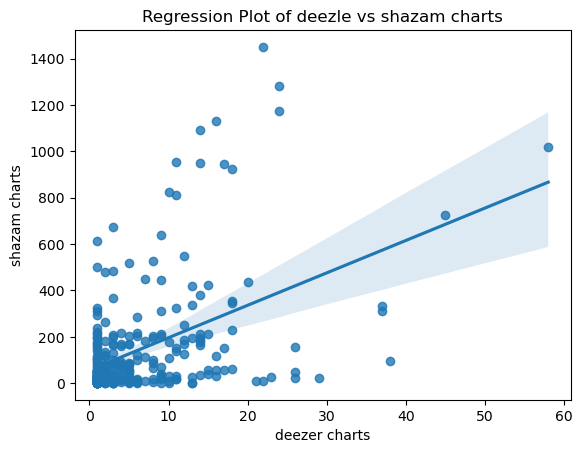

In [13]:
sns.regplot(x=music_data["in_deezer_charts"], y=music_data["in_shazam_charts"], data=music_data)
plt.title("Regression Plot of deezle vs shazam charts")
plt.xlabel("deezer charts")
plt.ylabel("shazam charts")

plt.show()

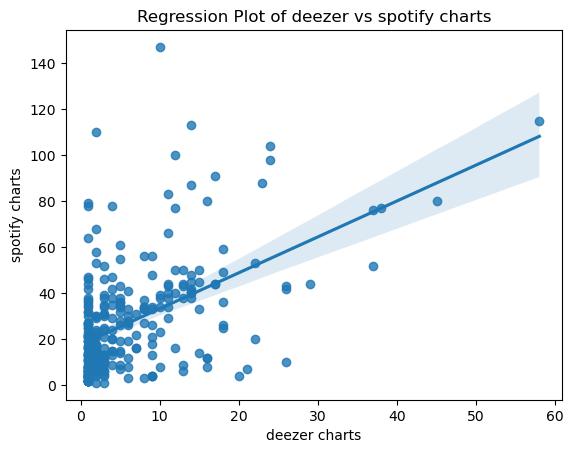

In [14]:
sns.regplot(x=music_data["in_deezer_charts"], y=music_data["in_spotify_charts"], data=music_data)
plt.title("Regression Plot of deezer vs spotify charts")
plt.xlabel("deezer charts")
plt.ylabel("spotify charts")

plt.show()

## Plot distribution of individual variables
Use histograms, KDE plots, box plots, and violin plots (choose 1 - 2) to show the distribution of data within 3 selected numerical columns. Be sure to include histograms to identify outliers

Do you need to remove any outliers

In [15]:
artist_counts = music_data["artist(s)_name"].value_counts()
#value_counts - learned this from chat GPT 
popular_artists = artist_counts.index[artist_counts >= 3]
filtered_music_data = music_data[music_data["artist(s)_name"].isin(popular_artists)] 
#just the data for popular artists 
#isin - learned this from chat GPT 


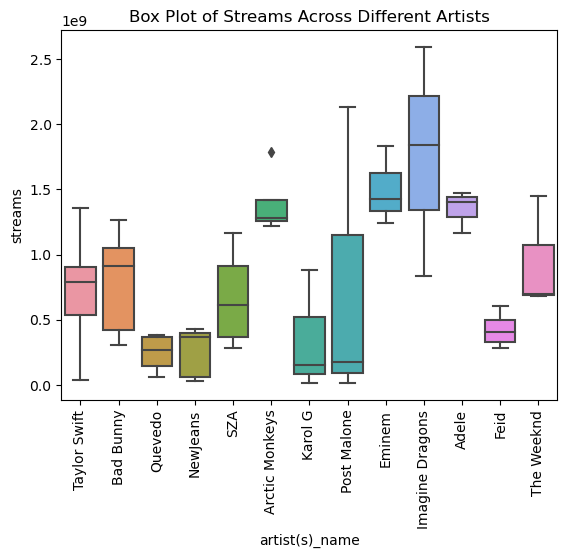

In [16]:
sns.boxplot(x=filtered_music_data["artist(s)_name"], y=filtered_music_data["streams"], data=filtered_music_data)
plt.xticks(rotation=90)
plt.title('Box Plot of Streams Across Different Artists')
plt.show()

In [26]:
# some of the artists have very small range in streams meaning most of their songs have a similar popularity, however, others have wider ranges. 

<function matplotlib.pyplot.show(close=None, block=None)>

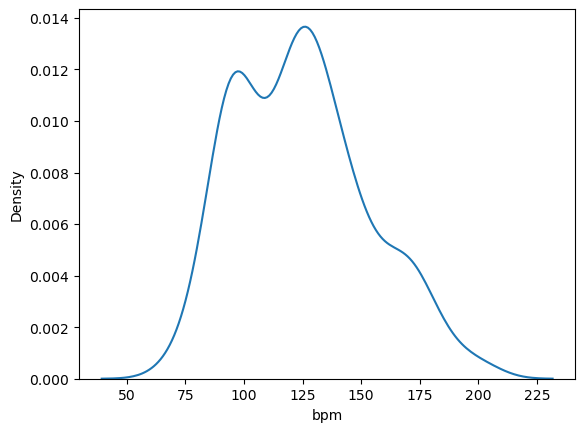

In [27]:
sns.kdeplot(x=music_data["bpm"])
plt.show

## Correlations
Use heatmaps to find interesting correlations between data. Keep in mind that you can only use a heatmap on numerical data.

<Axes: >

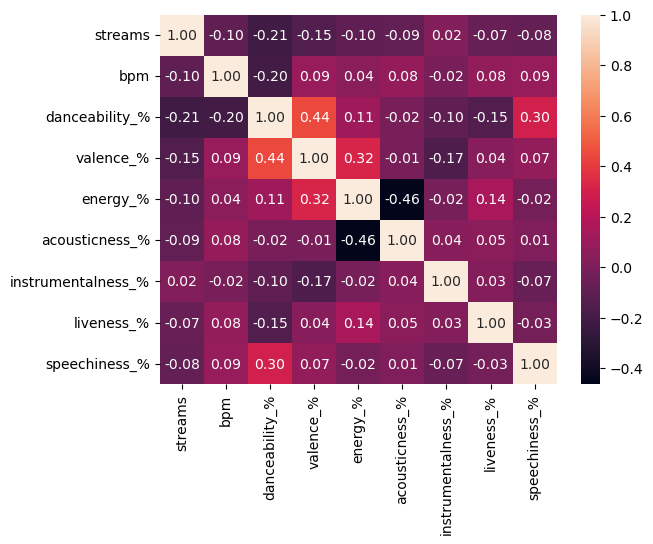

In [28]:
list_of_interesting_data = ["streams", "bpm", "danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]
corr = music_data[list_of_interesting_data].corr()

sns.heatmap(corr, annot=True, fmt=".2f")

## Relationships
Focus in on relationships. Create relplots, scatter plots, pairplots, and jointplots to showcase any relationships that you see within the data. Create a comprehensive exploration of the data.

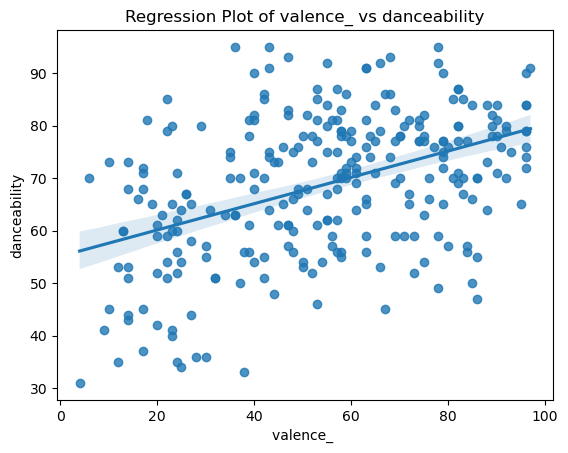

In [19]:
sns.regplot(x=music_data["valence_%"], y=music_data["danceability_%"], data=music_data)
plt.title("Regression Plot of valence_ vs danceability")
plt.xlabel("valence_ ")
plt.ylabel("danceability")

plt.show()

In [ ]:
# i tested this first as it was the best correlated on the heat map; the data, however, seems to prove that they are not so correlated, but rather they are simply more correlated than other relationships. 

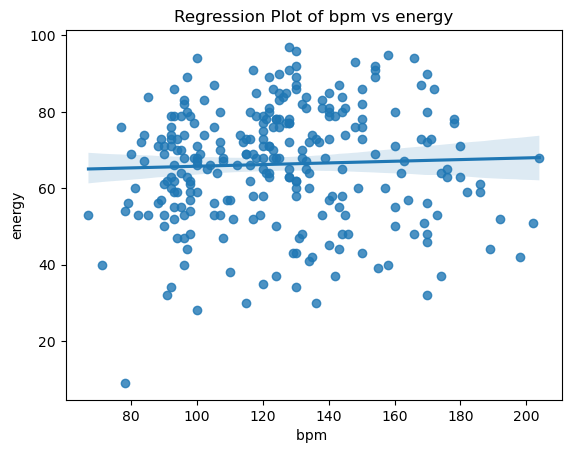

In [29]:
sns.regplot(x=music_data["bpm"], y=music_data["energy_%"], data=music_data)
plt.title("Regression Plot of bpm vs energy")
plt.xlabel("bpm ")
plt.ylabel("energy")

plt.show()

In [31]:
#i was interested to see if bpm and energy had any trends in the graph as intuitivly youd think they do. However,  I was surprised to see that their graph does not have trends. 

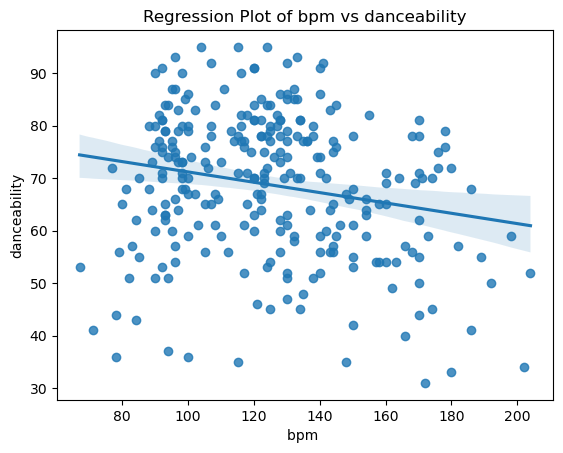

In [33]:
sns.regplot(x=music_data["bpm"], y=music_data["danceability_%"], data=music_data)
plt.title("Regression Plot of bpm vs danceability")
plt.xlabel("bpm ")
plt.ylabel("danceability")

plt.show()

In [ ]:
#same exact situation as the last graph. 
#last week my mom and i talked about how in israeli music they are either "jump" songs or "bounce" songs meaning that the way you dance to a song was fully dependent on its beat. 
#i was interested to see if bpm and danceability had any trends in the graph as intuitivly youd think they do. However,  I was surprised to see that their graph does not have trends. 

For each group, write a short description of your findings.

## Conclusion
Based on everything, you explored write a summary of your findings. Include graphs to support your argument.

<Axes: >

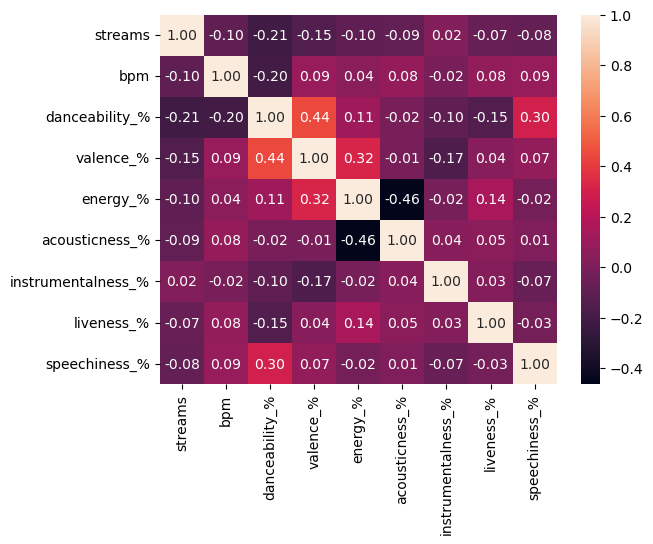

In [34]:
#the variables in my data set of choice are not very related. 
list_of_interesting_data = ["streams", "bpm", "danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]
corr = music_data[list_of_interesting_data].corr()

sns.heatmap(corr, annot=True, fmt=".2f")

<function matplotlib.pyplot.show(close=None, block=None)>

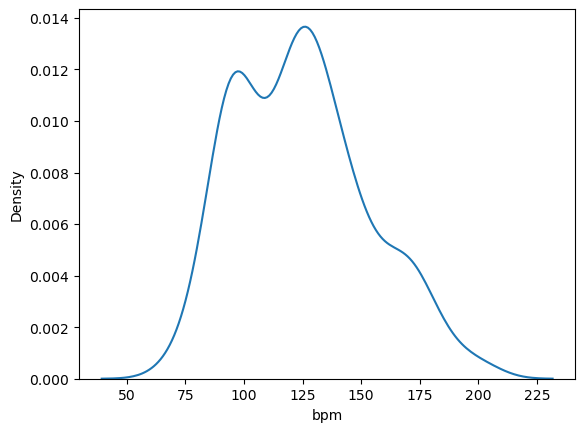

In [35]:
#most of the songs have bpm in the range of 90 to 140 (about they are the two local max)
sns.kdeplot(x=music_data["bpm"])
plt.show

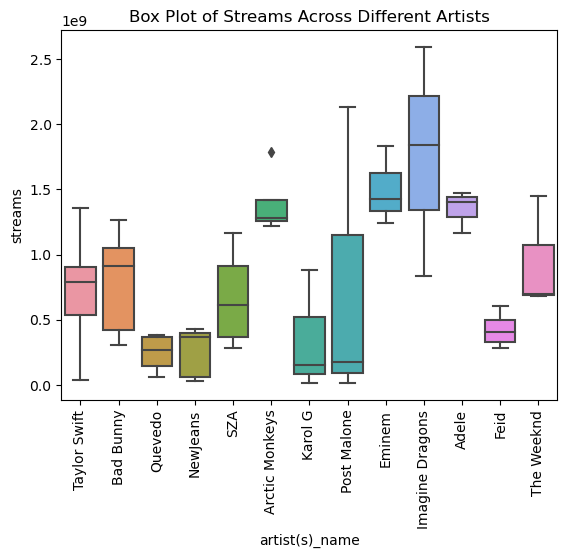

In [38]:
#this is my favorite plot! i explain why it is so interesting above. 
# Arctic Monkeys' songs are all around the same level of popularity, while Post Malone has far more variety in the popularity of his songs. 
sns.boxplot(x=filtered_music_data["artist(s)_name"], y=filtered_music_data["streams"], data=filtered_music_data)
plt.xticks(rotation=90)
plt.title('Box Plot of Streams Across Different Artists')
plt.show()

In [39]:
# lastly, i found it interesting that all of the streaming services have very different placements for songs. there were many outliers and it was hard to find trends.
# i thought that a